Q. Write a program implement backpropagation algorithm.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:


census_data = pd.read_csv("census.csv")

# Display basic information and the first few rows of the dataset
census_info = census_data.info()
census_head = census_data.head()

census_info, census_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(None,
    age          workclass  final-weight   education  education-num  \
 0   39          State-gov         77516   Bachelors             13   
 1   50   Self-emp-not-inc         83311   Bachelors             13   
 2   38            Private        215646     HS-grad              9   
 3   53            Private        234721        11th              7   
 4   28            Private        338409   Bachelors             13   
 
         marital-status          occupation    relationship    race      sex  \
 0        Never-married        Adm-clerical   Not-in-family   White     Male   
 1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
 2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
 3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
 4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
 
    capital-gain  capital-loos  hour-per-week  native-country  income  
 0         

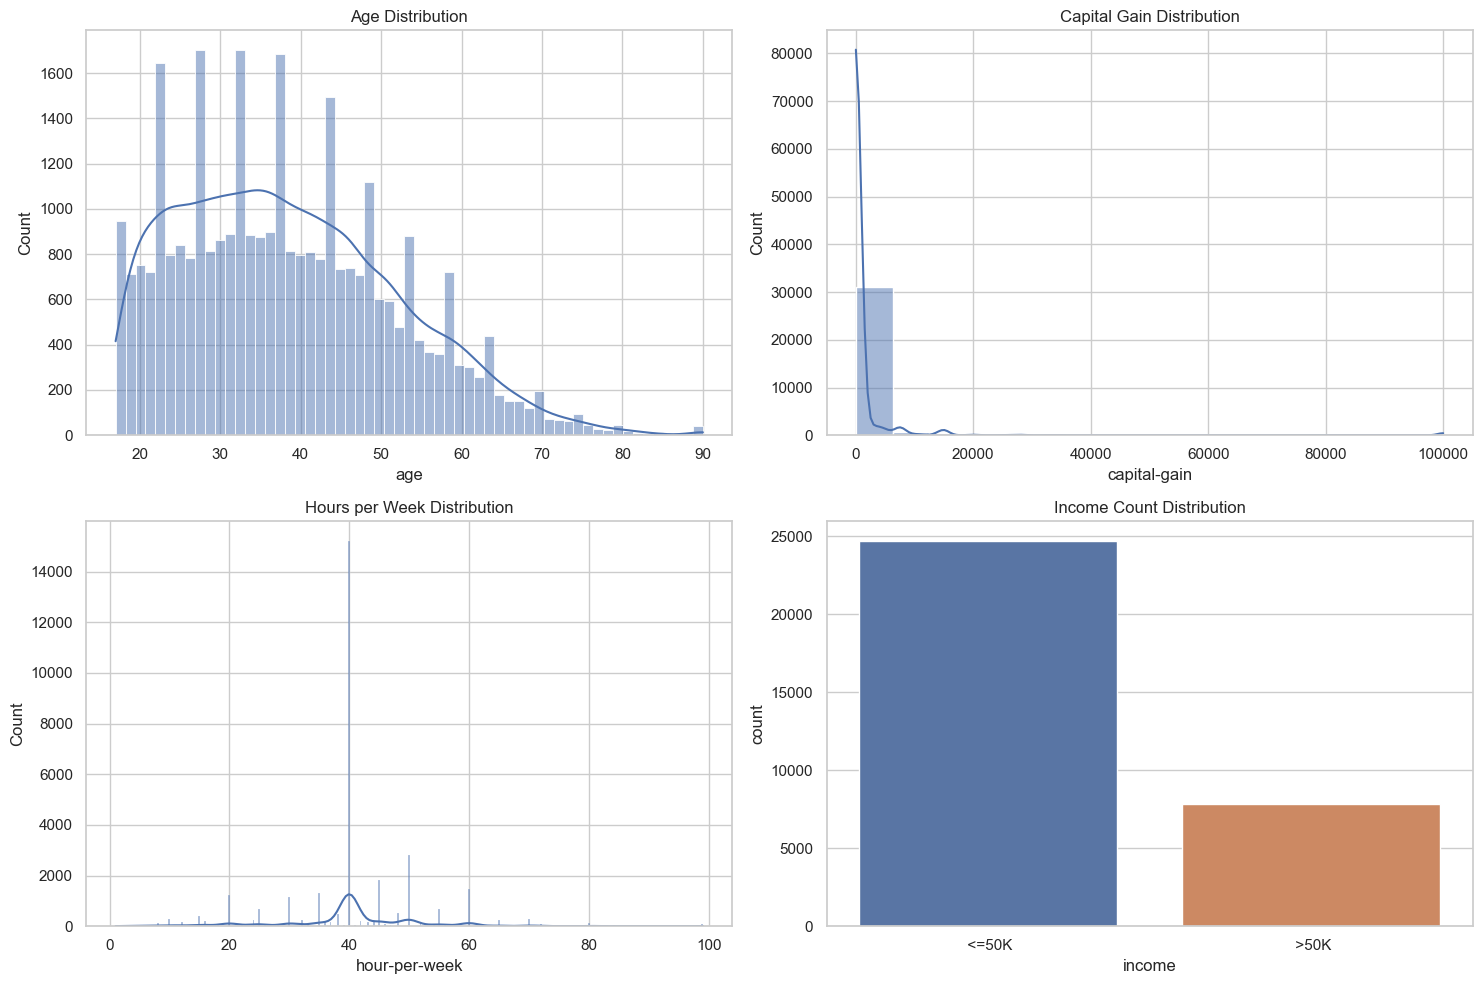

In [4]:
# Set plot style
sns.set(style="whitegrid")

# Create a figure for multiple plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of age
sns.histplot(census_data['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Capital gain distribution
sns.histplot(census_data['capital-gain'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Capital Gain Distribution')

# Hours per week distribution
sns.histplot(census_data['hour-per-week'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Hours per Week Distribution')

# Count plot of income levels
sns.countplot(x='income', data=census_data, ax=axes[1, 1])
axes[1, 1].set_title('Income Count Distribution')

plt.tight_layout()
plt.show()

In [16]:
# Drop rows with missing values (if any)
census_data_cleaned = census_data.dropna()

# Separate features and target variable
X = census_data_cleaned.drop('income', axis=1)
y = census_data_cleaned['income']

# Encode target variable ('<=50K' -> 0, '>50K' -> 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define categorical columns to one-hot encode
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']

# Apply OneHotEncoder to categorical columns and standard scaling to numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Transform the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3, random_state=42)

X_train.shape, X_test.shape


((22792, 108), (9769, 108))

In [20]:
import numpy as np

# Define the neural network architecture
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        # Initialize biases
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        # Set learning rate
        self.learning_rate = 0.01
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def forward_propagation(self, X):
        # Convert sparse matrix to dense format if needed
        if hasattr(X, 'toarray'):
            X = X.toarray()
        
        # Input to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        
        # Hidden to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_input)
        return self.output
    
    def backward_propagation(self, X, y):
        # Calculate the error
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)
        
        # Calculate the error for the hidden layer
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_hidden_output += self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.weights_input_hidden += self.learning_rate * np.dot(X.T, hidden_delta)
        self.bias_output += self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.bias_hidden += self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)
    
    def train(self, X, y, epochs, batch_size=32):
        num_samples = X.shape[0]
        for epoch in range(epochs):
            for i in range(0, num_samples, batch_size):
                # Fetch the batch
                X_batch = X[i:i+batch_size].toarray() if hasattr(X[i:i+batch_size], 'toarray') else X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                
                # Forward propagation
                self.forward_propagation(X_batch)
                
                # Backward propagation and weight update
                self.backward_propagation(X_batch, y_batch)
            
            # Print loss every 100 epochs (calculate it for the entire dataset)
            if epoch % 100 == 0:
                # Forward propagation for entire dataset
                self.forward_propagation(X)
                loss = np.mean(np.square(y - self.output))
                print(f"Epoch {epoch}, Loss: {loss}")
    
    def predict(self, X):
        return self.forward_propagation(X)

# Preprocessing the target variable
y_train_reshaped = y_train.reshape(-1, 1)

# Instantiate the neural network with one hidden layer
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1  # Binary classification (<=50K or >50K)
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network using mini-batch gradient descent
nn.train(X_train, y_train_reshaped, epochs=5000, batch_size=32)

# Predict on test data
predictions = nn.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)

# Accuracy of the model
accuracy = np.mean(predictions_binary.flatten() == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Epoch 0, Loss: 0.13431615795182775
Epoch 100, Loss: 0.09691786685122009
Epoch 200, Loss: 0.09485962149273024
Epoch 300, Loss: 0.09346639904366555
Epoch 400, Loss: 0.09217869001721832
Epoch 500, Loss: 0.09110480166302717
Epoch 600, Loss: 0.09029366666408334
Epoch 700, Loss: 0.0896454611652523
Epoch 800, Loss: 0.08915963944760455
Epoch 900, Loss: 0.08873553363320888
Epoch 1000, Loss: 0.0882927813164462
Epoch 1100, Loss: 0.08786208755064978
Epoch 1200, Loss: 0.08749144121523116
Epoch 1300, Loss: 0.08716609990293596
Epoch 1400, Loss: 0.08688535137874502
Epoch 1500, Loss: 0.08662841206372347
Epoch 1600, Loss: 0.08638721185480396
Epoch 1700, Loss: 0.08616892088018388
Epoch 1800, Loss: 0.08597510627062653
Epoch 1900, Loss: 0.08579798742597383
Epoch 2000, Loss: 0.08563108955657153
Epoch 2100, Loss: 0.08547104629510568
Epoch 2200, Loss: 0.08531735164984179
Epoch 2300, Loss: 0.08517464648009476
Epoch 2400, Loss: 0.08504530876701116
Epoch 2500, Loss: 0.08492862436183175
Epoch 2600, Loss: 0.084823

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "d:\Anaconda\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "d:\Anaconda\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "d:\Anaconda\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "d:\Anaconda\Lib\asyncio\selector_events.py", line 119, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was f